Aim:

Perform SVM on multiple classes

Algorithm:

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates data points of different classes in a high-dimensional space. The goal of SVM is to maximize the margin, which is the distance between the closest points of each class (known as support vectors) to the hyperplane. SVM can efficiently handle both linear and non-linear classification problems by using different kernel functions, such as linear, polynomial, or radial basis function (RBF) kernels. Due to its ability to work well with high-dimensional data and its focus on maximizing the margin, SVM is particularly effective for tasks where the classes are clearly separated.

Code:



In [258]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [259]:
iris_bunch = datasets.load_iris() #Bunch object with data , target , feature_names

In [260]:
df = pd.DataFrame(iris_bunch.data , columns =  iris_bunch.feature_names)
# df["target"] = iris_bunch.target Add target after scaling the features

In [261]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [262]:
df.isnull().sum() #StandardScaler do not work with null values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [263]:
scaler = StandardScaler()
df_scaledto_array = scaler.fit_transform(df) #Target should not be scaled

In [264]:
df = pd.DataFrame(df_scaledto_array,columns = iris_bunch.feature_names)

In [265]:
df["target"] = iris_bunch.target

In [266]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [267]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [268]:
X = df.drop("target",axis = 1)
y = df["target"]

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

One vs One

In [270]:
svm_ovo = SVC(decision_function_shape='ovo')
svm_ovo.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [271]:
y_pred_ovo = svm_ovo.predict(X_test)
print("One-vs-One Accuracy:", accuracy_score(y_test, y_pred_ovo))

One-vs-One Accuracy: 1.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


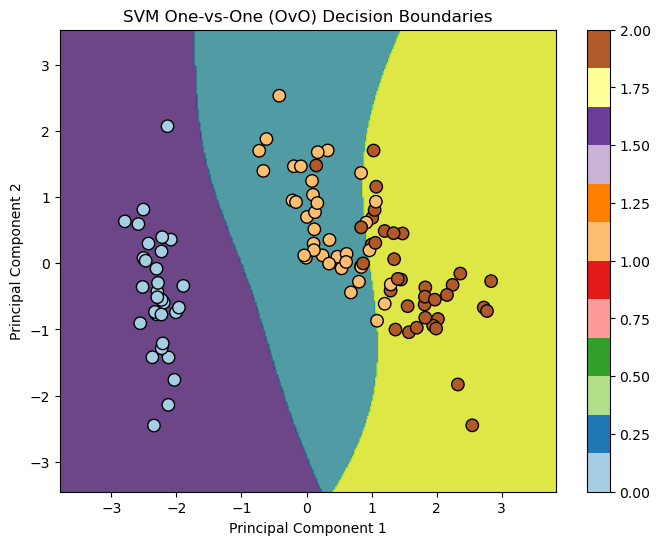

In [272]:
# Apply PCA to reduce the data to 2D for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, pca, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Map the mesh grid to the original 4D space using the inverse PCA transform
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()

# Plot decision boundaries for the OvO classifier on the PCA-reduced data
plt.figure(figsize=(8, 6))
plot_decision_boundaries(X_train_2D, y_train, svm_ovo, pca, "SVM One-vs-One (OvO) Decision Boundaries")
plt.show()


Testing overfitting

Using cross validation

In [273]:
scores = cross_val_score(svm_ovo,X,y,cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')
#The cross validation scores are high and consistent

Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean cross-validation score: 0.9666666666666666


Using train test split

In [274]:
train_accuracy = accuracy_score(y_train, svm_ovo.predict(X_train))
test_accuracy = accuracy_score(y_test, svm_ovo.predict(X_test))
print(f'Training accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')
#As there is no big difference between train and test , the model generalizes well.

Training accuracy: 0.9619047619047619
Test accuracy: 1.0


One vs All

In [275]:
svm_ova = SVC(decision_function_shape='ovr')
svm_ova.fit(X_train, y_train)

SVC()

In [276]:
y_pred_ova = svm_ova.predict(X_test)
print("One-vs-All Accuracy:", accuracy_score(y_test, y_pred_ova))

One-vs-All Accuracy: 1.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


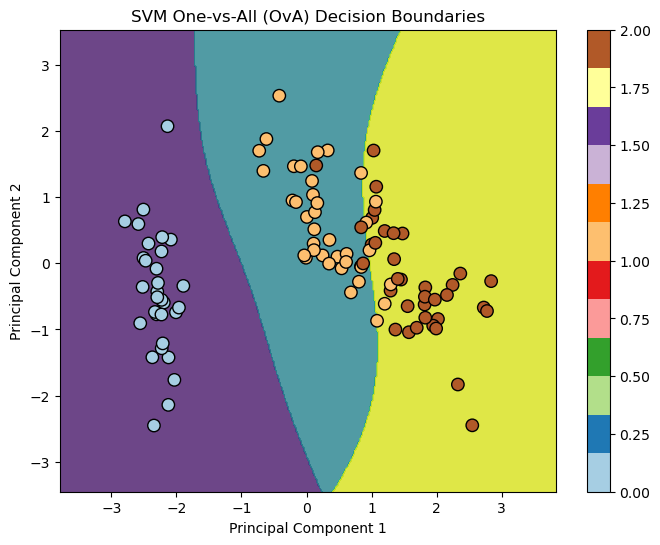

In [277]:
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, pca, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Map the mesh grid to the original 4D space using the inverse PCA transform
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()

# Plot decision boundaries for the OvA classifier on the PCA-reduced data
plt.figure(figsize=(8, 6))
plot_decision_boundaries(X_train_2D, y_train, svm_ova, pca, "SVM One-vs-All (OvA) Decision Boundaries")
plt.show()

Testing overfitting

Using cross validation

In [278]:
cores = cross_val_score(svm_ovo,X,y,cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')
#The cross validation scores are high and consistent

Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean cross-validation score: 0.9666666666666666


Using train test split

In [279]:
train_accuracy = accuracy_score(y_train, svm_ovo.predict(X_train))
test_accuracy = accuracy_score(y_test, svm_ovo.predict(X_test))
print(f'Training accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')
#As there is no big difference between train and test , the model generalizes well.

Training accuracy: 0.9619047619047619
Test accuracy: 1.0


Result:

SVM on multiple classes has been applied using One vs One and One vs All